In [230]:
from os import listdir
from os.path import isfile, join
import math
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
root_dir = './results'

In [232]:
results=[]
for f in listdir(root_dir):
    path = join(root_dir, f)
    if isfile(path):
        #print(path)
        fo = open(path)
        jso = json.loads(fo.read())
        
        splt = f.split('_')
        vm = splt[2]
        vm_version = 8
        timestamp = splt[-1][:-5]
        pattern = splt[1]
        program = splt[0]
        language = 'activity diagram'
        if len(jso) > 0:
            for (idx, time) in enumerate(jso[0]['primaryMetric']['rawData'][0]):
                    results.append({
                            'vm': vm,
                            'vm_version': str(vm_version),
                            'vm_full': vm + ' ' + str(vm_version),
                            'pattern': pattern,
                            'program': program,
                            'language': language,
                            'timestamp': timestamp,
                            'time': time,
                            'idx': idx
                    })
        else:
            print(path, 'EMPTY')

df = pd.DataFrame(results)

df['pattern_order'] = df['pattern'].map({
    'interpreter': 0,
    'visitor': 1,
    'switch': 2,
    'monolithicrevisitor': 3,
    'modularrevisitor': 4,
})

df = df.sort_values(by=['pattern_order', 'vm_full', 'program'])

df.describe(include='all')

,vm,vm_version,vm_full,pattern,program,language,timestamp,time,idx,pattern_order
count,3001,3001,3001,3001,3001,3001,3001,3001.000000,3001.000000,3001.000000
unique,3,1,3,5,3,1,16,NaN,NaN,NaN
top,openj9-8u222-b10,8,openj9-8u222-b10 8,modularrevisitor,p2,activity diagram,1568106122413,NaN,NaN,NaN
freq,1400,3001,1400,1200,1200,3001,200,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105292,99.466844,2.466178
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066906,57.762869,1.586276
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022976,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048016,49.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094818,99.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127767,149.000000,4.000000


In [233]:
nwp = df[df['idx']>50]

nwp.loc[nwp.pattern == 'revisitor', 'pattern'] = 'visitor'
#print(nwp.pattern.unique())
#print(nwp.pattern_order.unique())
nwp = nwp.sort_values(by=['pattern_order', 'vm_full', 'program'])
nwp

/home/manuel/.local/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,vm,vm_version,vm_full,pattern,program,language,timestamp,time,idx,pattern_order
2052,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040938,51,0
2053,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040408,52,0
2054,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040996,53,0
2055,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040490,54,0
2056,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040968,55,0
2057,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040442,56,0
2058,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040784,57,0
2059,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040441,58,0
2060,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040481,59,0
2061,openj9-8u222-b10,8,openj9-8u222-b10 8,interpreter,p1,activity diagram,1568105161010,0.040551,60,0


In [235]:
nb_docs=15

variances = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.var())
variances["program"] = ""
variances["vm_full"] = ""
variances["pattern"] = ""
variances.program = variances.index.get_level_values(0)
variances.vm_full = variances.index.get_level_values(1)
variances.pattern = variances.index.get_level_values(2)
variances.index = range(nb_docs)
variances.rename(columns={"time":"Variance"}, inplace=True)

deviations = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.std())
deviations["program"] = ""
deviations["vm_full"] = ""
deviations["pattern"] = ""
deviations.program = deviations.index.get_level_values(0)
deviations.vm_full = deviations.index.get_level_values(1)
deviations.pattern = deviations.index.get_level_values(2)
deviations.index = range(nb_docs)
deviations.rename(columns={"time":"Deviation"}, inplace=True)

means = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.mean())
means["program"] = ""
means["vm_full"] = ""
means["pattern"] = ""
means.program = means.index.get_level_values(0)
means.vm_full = means.index.get_level_values(1)
means.pattern = means.index.get_level_values(2)
means.index = range(nb_docs)
means.rename(columns={"time":"Mean"}, inplace=True)

medians = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.median())
medians["program"] = ""
medians["vm_full"] = ""
medians["pattern"] = ""
medians.program = medians.index.get_level_values(0)
medians.vm_full = medians.index.get_level_values(1)
medians.pattern = medians.index.get_level_values(2)
medians.index = range(nb_docs)
medians.rename(columns={"time":"Median"}, inplace=True)

stats = pd.concat([means, medians, deviations, variances], axis=1)
stats = stats.loc[:,~stats.columns.duplicated()]
stats.sort_values(by=['vm_full', 'pattern', 'program'])

,Mean,program,vm_full,pattern,Median,Deviation,Variance
0,0.086565,p1,graalvm-ce-19.1.1 8,modularrevisitor,0.086539,0.000432,1.868751e-07
5,0.124236,p2,graalvm-ce-19.1.1 8,modularrevisitor,0.124076,0.000493,2.427168e-07
11,0.127670,p3,graalvm-ce-19.1.1 8,modularrevisitor,0.127548,0.000460,2.112648e-07
1,0.023120,p1,graalvm-ce-19.1.1 8,visitor,0.023098,0.000111,1.222123e-08
6,0.031232,p2,graalvm-ce-19.1.1 8,visitor,0.031176,0.000460,2.112274e-07
2,0.078273,p1,hotspot-8u222-b10 8,monolithicrevisitor,0.078195,0.000440,1.937924e-07
7,0.094589,p2,hotspot-8u222-b10 8,monolithicrevisitor,0.094542,0.000538,2.897810e-07
12,0.095688,p3,hotspot-8u222-b10 8,monolithicrevisitor,0.095586,0.000574,3.298391e-07
3,0.040282,p1,openj9-8u222-b10 8,interpreter,0.040250,0.000497,2.466573e-07
8,0.048033,p2,openj9-8u222-b10 8,interpreter,0.047758,0.002482,6.158278e-06


# line plots with warmup!

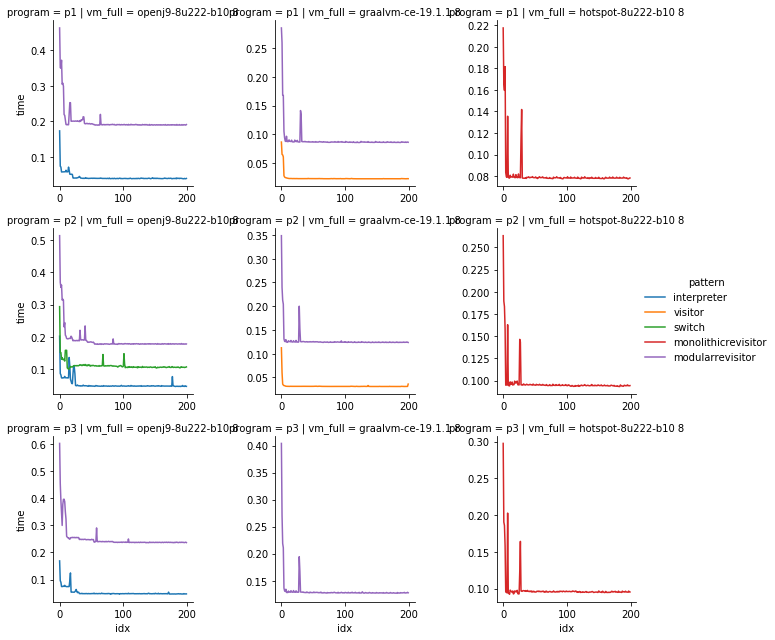

In [236]:
grid = sns.FacetGrid(df, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.lineplot, "idx", "time").add_legend()
#grid.fig.tight_layout()

# line plot without warmup (idx > 50)

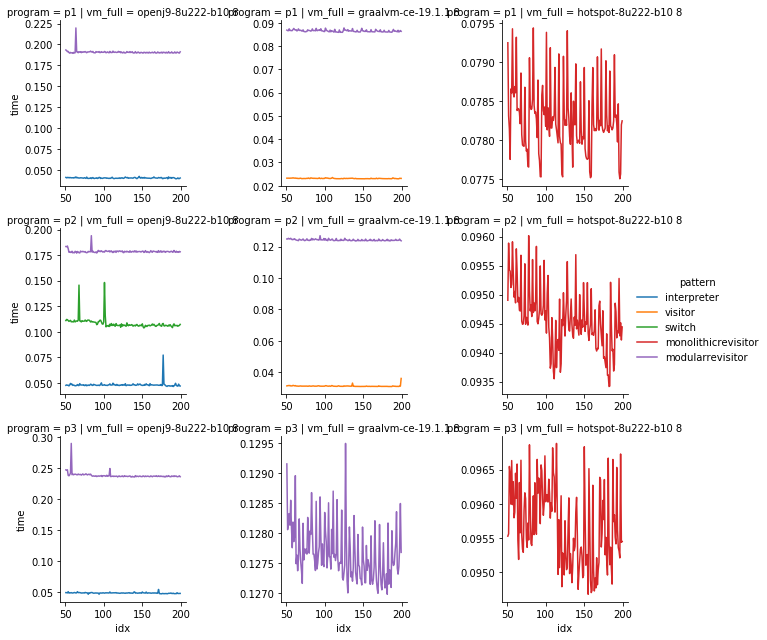

In [237]:
grid = sns.FacetGrid(nwp, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.lineplot, "idx", "time").add_legend()
#grid.fig.tight_layout()

# histogram with warmup

/home/manuel/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/manuel/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


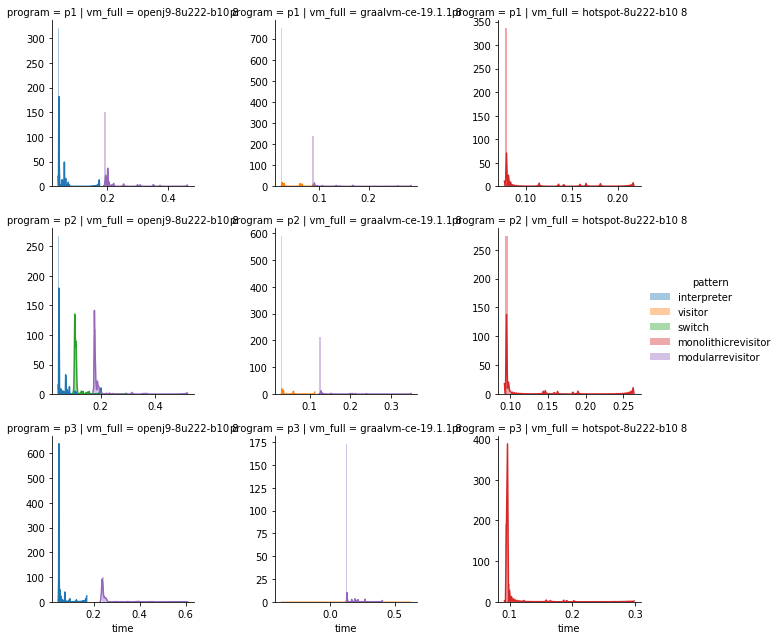

In [238]:
grid = sns.FacetGrid(df, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.distplot,  "time").add_legend()

# histogram without warmup

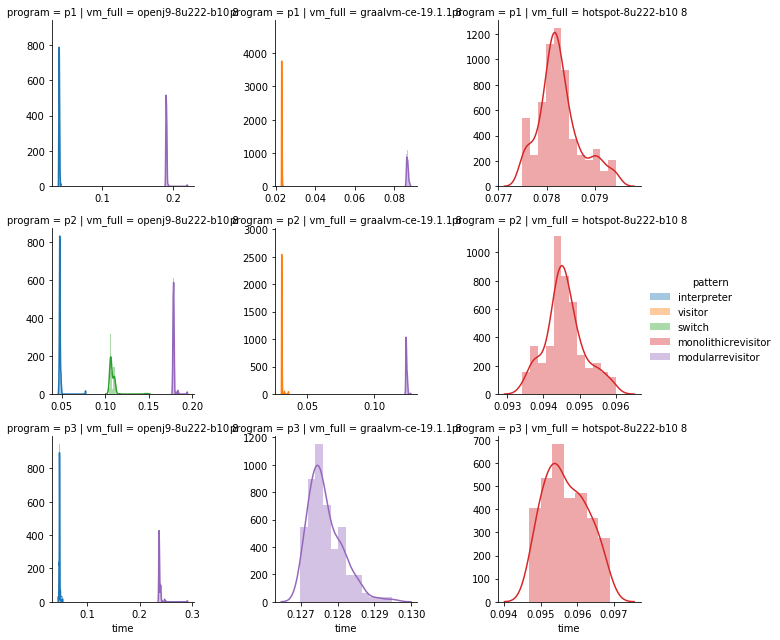

In [239]:
grid = sns.FacetGrid(nwp, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.distplot,  "time").add_legend()

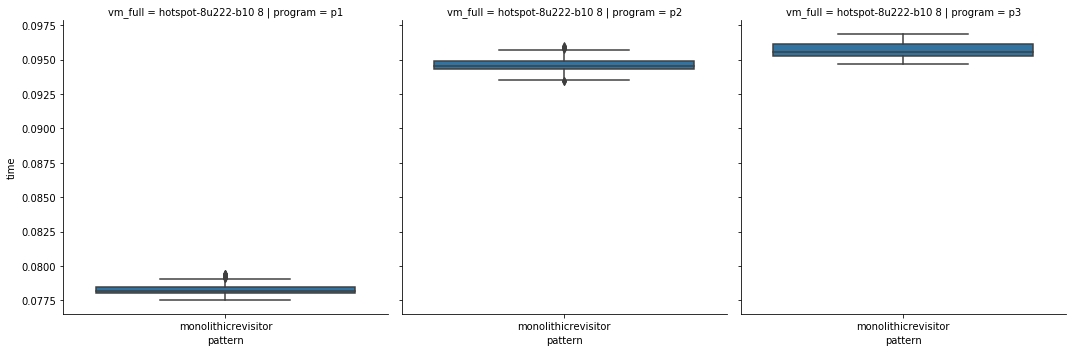

In [240]:
#grid = sns.FacetGrid(nwp, col="pattern", row="vm_full", hue="program", sharex=False, sharey=False)
nwp_hp8 = nwp[nwp['vm_full'] == 'hotspot-8u222-b10 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True)

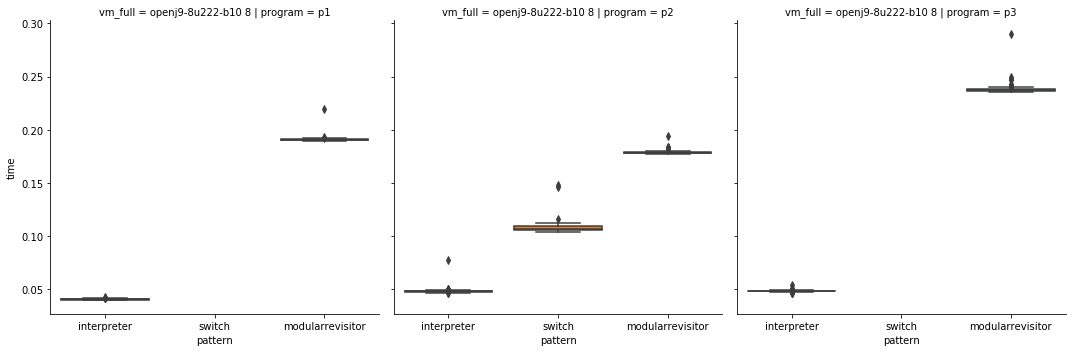

In [241]:
nwp_hp8 = nwp[nwp['vm_full'] == 'openj9-8u222-b10 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True)

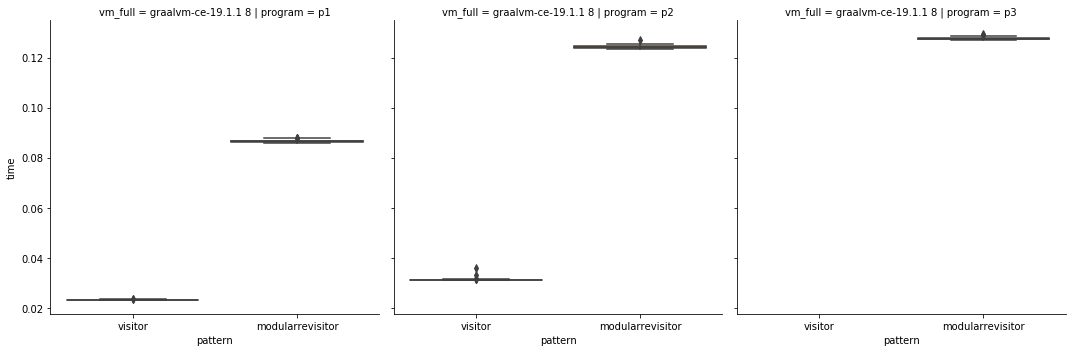

In [242]:
nwp_hp8 = nwp[nwp['vm_full'] == 'graalvm-ce-19.1.1 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True)